In [31]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [32]:
df1 = pd.read_csv('Bank Customer Churn Prediction.csv')
df2 = pd.read_csv('Bank Customer Churn Prediction.csv')

In [33]:
df1

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [34]:
df1 = df1.drop(['customer_id', 'products_number', 'credit_card', 'active_member', 'churn'], axis=1)

le = LabelEncoder()
df1['country'] = le.fit_transform(df1['country'])
df1['gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

df1

#те ж саме для df2
df2 = df2.drop(['customer_id', 'products_number', 'credit_card', 'active_member', 'churn'], axis=1)

le = LabelEncoder()
df2['country'] = le.fit_transform(df2['country'])
df2['gender'].replace(['Female', 'Male'], [0, 1], inplace=True)


In [35]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)
df2['age_group'] = pd.cut(df2['age'], bins=bins, labels=labels, right=False)

In [36]:
le = LabelEncoder()
df1['age_group'] = le.fit_transform(df1['age_group'])
df2['age_group'] = le.fit_transform(df2['age_group'])

In [38]:
from sklearn.preprocessing import LabelEncoder

cols = df1.columns.difference(['age_group'])

le = LabelEncoder()

df1[cols] = df1[cols].apply(le.fit_transform)
df2[cols] = df2[cols].apply(le.fit_transform)

In [39]:
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
train_mask = is_number(df1.dtypes)
test_mask = is_number(df1.dtypes)

print('No gaps' if pd.api.types.is_numeric_dtype(df1) and pd.api.types.is_numeric_dtype(df2) else 'Replace some data in column', df1.columns[~train_mask], df2.columns[~test_mask])

Replace some data in column Index([], dtype='object') Index([], dtype='object')


Розділення даних по класам

In [42]:
df1 = df1[['age_group'] + [x for x in df1.columns if x != 'age_group']]
df2 = df2[['age_group'] + [x for x in df2.columns if x != 'age_group']]

df1_young = df1.loc[df1['age_group'] == 'young']
df1_middle = df1.loc[df1['age_group'] == 'middle']
df1_old = df1.loc[df1['age_group'] == 'old']
#для df2
df2_young = df2.loc[df2['age_group'] == 'young']
df2_middle = df2.loc[df2['age_group'] == 'middle']
df2_old = df2.loc[df2['age_group'] == 'old']

In [43]:
X_train = df1.iloc[:, 1:7]
Y_train = df1.iloc[:, 0]
X_test = df2.iloc[:, 1:7]
Y_test = df2.iloc[:, 0]

In [44]:
labelencoder_X = LabelEncoder()
labelencoder_Y = LabelEncoder()

Y_train = labelencoder_Y.fit_transform(Y_train)
Y_test = labelencoder_Y.transform(Y_test)

In [45]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)
X_test, Y_test = shuffle(X_test, Y_test, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [47]:
Y_train

array([2, 3, 3, ..., 2, 3, 4], dtype=int64)

PCA

In [48]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

pca = PCA()
X_pca = pca.fit_transform(X_std)

In [49]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

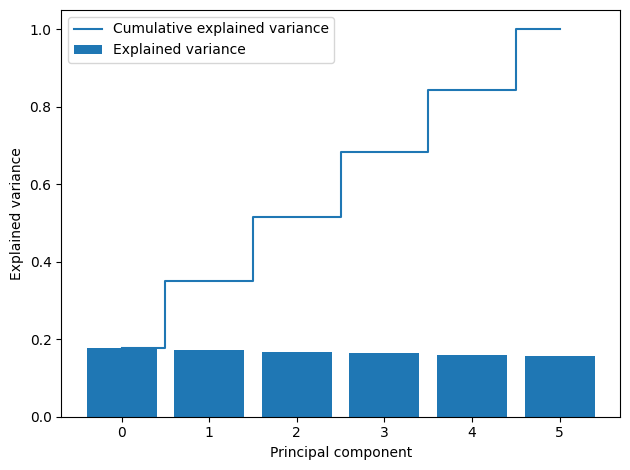

In [50]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [51]:
y = Y_train

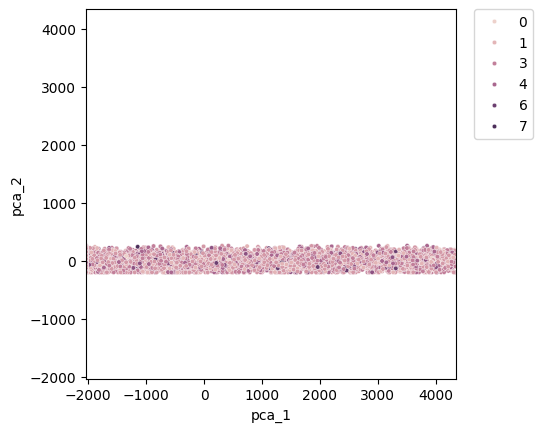

In [52]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min(), pca_result.max())
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

t-distributed Stochastic Neighbor Embedding

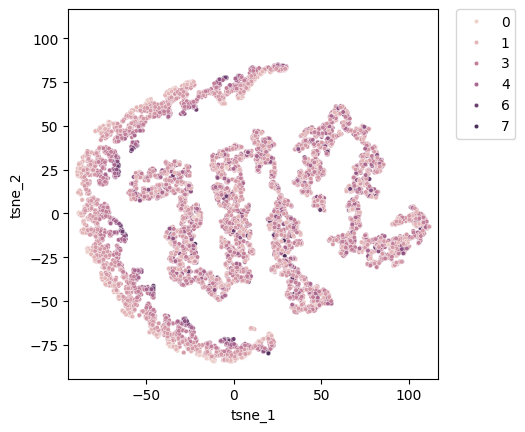

In [53]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_train)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Квантування зображення

In [81]:
from time import time
import cv2
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
n_colors = 32
# Make sure the file path is correct and accessible
task_image = cv2.imread("Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg", cv2.IMREAD_UNCHANGED)

# Check if the image is loaded correctly
if task_image is None:
    raise ValueError("The image has not been loaded. Check the file path.")

task_image = np.array(task_image, dtype=np.float64) / 255
unique_colors = len(np.unique(task_image))


In [82]:
w, h, d = original_shape = tuple(task_image.shape)
image_array = np.reshape(task_image, (w * h, d))

In [85]:
n_samples = min(w * h, 1_000)
image_array_sample = shuffle(image_array, random_state=1, n_samples=n_samples)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)
codebook_random = shuffle(image_array, random_state=2, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -5)

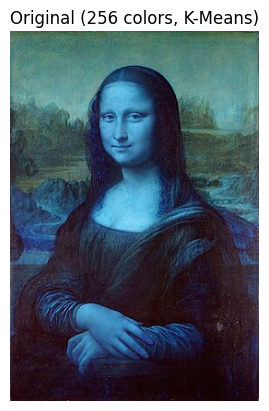

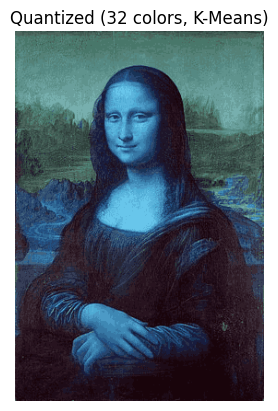

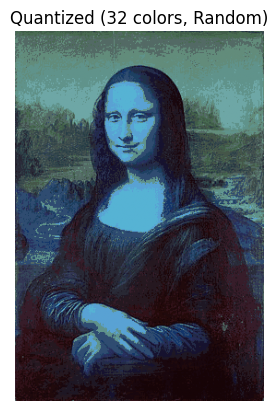

In [86]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Original ({unique_colors} colors, K-Means)")
plt.imshow(task_image)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

Обробка та класифікація текстових даних

In [87]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

text_df = pd.read_csv('IMDb Movie Review Sentiment.csv')
text_df.info()
text_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


,text,label
0,I love sci-fi and am willing to put up with a ...,0
1,"Worth the entertainment value of a rental, esp...",0
2,its a totally average film with a few semi-alr...,0
3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,"First off let me say, If you haven't enjoyed a...",0
...,...,...
24995,Just got around to seeing Monster Man yesterda...,1
24996,I got this as part of a competition prize. I w...,1
24997,I got Monster Man in a box set of three films ...,1
24998,"Five minutes in, i started to feel how naff th...",1


In [90]:
X_text_train = text_df.iloc[:, 0] #text
Y_text_train = text_df.iloc[:, 1] #label

In [91]:
X_text_train

0        I love sci-fi and am willing to put up with a ...
1        Worth the entertainment value of a rental, esp...
2        its a totally average film with a few semi-alr...
3        STAR RATING: ***** Saturday Night **** Friday ...
4        First off let me say, If you haven't enjoyed a...
                               ...                        
24995    Just got around to seeing Monster Man yesterda...
24996    I got this as part of a competition prize. I w...
24997    I got Monster Man in a box set of three films ...
24998    Five minutes in, i started to feel how naff th...
24999    I caught this movie on the Sci-Fi channel rece...
Name: text, Length: 25000, dtype: object

In [92]:
Y_text_train

0        0
1        0
2        0
3        0
4        0
        ..
24995    1
24996    1
24997    1
24998    1
24999    1
Name: label, Length: 25000, dtype: int64

In [94]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler()

X_text_simpl, Y_text_simpl = undersampler.fit_resample(np.array(X_text_train).reshape(-1, 1), np.array(Y_text_train).reshape(-1, 1))
Text_data_simp = pd.DataFrame({'text': X_text_simpl.reshape(Y_text_simpl.shape), 'label': Y_text_simpl})

Візуалізація

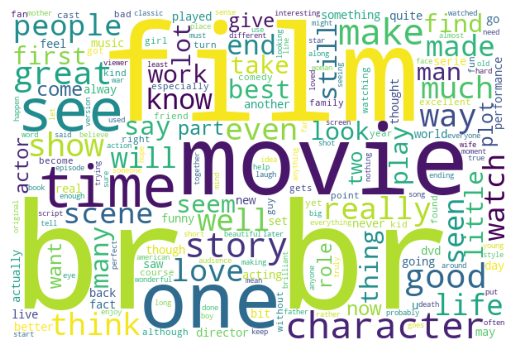

In [106]:
import wordcloud
from wordcloud import WordCloud

def visualize(thing):
    text = ''
    for msg in Text_data_simp[Text_data_simp['label'] == thing]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

i = 1
visualize(i)



In [107]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
X_text_train, X_text_test, Y_text_train, Y_text_test = train_test_split(Text_data_simp['text'], Text_data_simp['label'], test_size=0.20)

In [108]:
labelencoder_text = LabelEncoder()
Y_text_train = labelencoder_text.fit_transform(Y_text_train) 
Y_text_test = labelencoder_text.transform(Y_text_test) 

In [109]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X_text_train_transformed = vectorizer.fit_transform(X_text_train)
X_text_test_transformed = vectorizer.transform(X_text_test)

Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
model_RFC_text = RandomForestClassifier(random_state=10,criterion='gini')
model_RFC_text.fit(X_text_train_transformed, Y_text_train)
pred_RFC_text = model_RFC_text.predict(X_text_test_transformed)
print(classification_report(Y_text_test,pred_RFC_text))
print(accuracy_score(Y_text_test,pred_RFC_text))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2471
           1       0.86      0.87      0.87      2529

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

0.8632


Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_text_train_transformed, Y_text_train)
predicted = clf.predict(X_text_test_transformed)

print(classification_report(Y_text_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2471
           1       0.89      0.91      0.90      2529

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



c:\Users\nukat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
